In [1]:
import pandas as pd
from rich import print
%load_ext rich
import evaluate as ev

In [2]:
em = ev.load("exact_match")

In [3]:
data = pd.read_csv("../results/flan-t5-large.csv")

In [4]:
data["exact_match"] = data.apply(lambda row: 
        em.compute(
                predictions=[row["predicted_answer"]], 
                references=[row["true_answer"]], 
                ignore_case=True, 
                ignore_punctuation=True
        )['exact_match'],
axis=1)

In [5]:
data.head(2)

,predicted_answer,uncertainty_estimate,true_answer,question,exact_match
0,thomas jefferson,0.258302,Mark Twain,What man was a famous American author and also...,0.0
1,three,0.094925,1,How many Academy Awards has Jake Gyllenhaal be...,0.0


In [6]:
x = []
y = []
for i in range(1, 1000):
    cutoff = (i / 1000) * data['uncertainty_estimate'].max()
    correctness = data['uncertainty_estimate'].apply(
        lambda x: 1 if x < cutoff else 0
    )
    ratio = (correctness==data['exact_match']).mean()
    x.append(cutoff)
    y.append(ratio)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

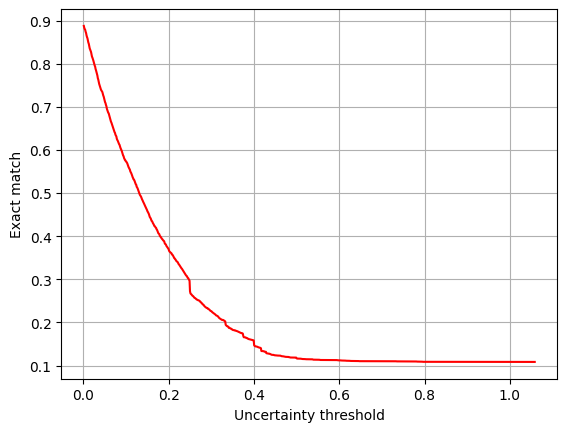

In [8]:
plt.plot(
    x, y, "r-"
)
plt.grid()
plt.xlabel("Uncertainty threshold")
plt.ylabel("Exact match")